In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
seasonal_data = pd.read_csv('../Capstone Project/Data/seasonality_analysis.csv', sep=',')


In [5]:
seasonal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424524 entries, 0 to 7424523
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   sale_date           object 
 1   day                 float64
 2   week                float64
 3   month               object 
 4   article_id          int64  
 5   product_type_name   object 
 6   product_group_name  object 
 7   total_sales         float64
 8   total_orders        int64  
 9   average_price       float64
 10  season              object 
dtypes: float64(4), int64(2), object(5)
memory usage: 623.1+ MB


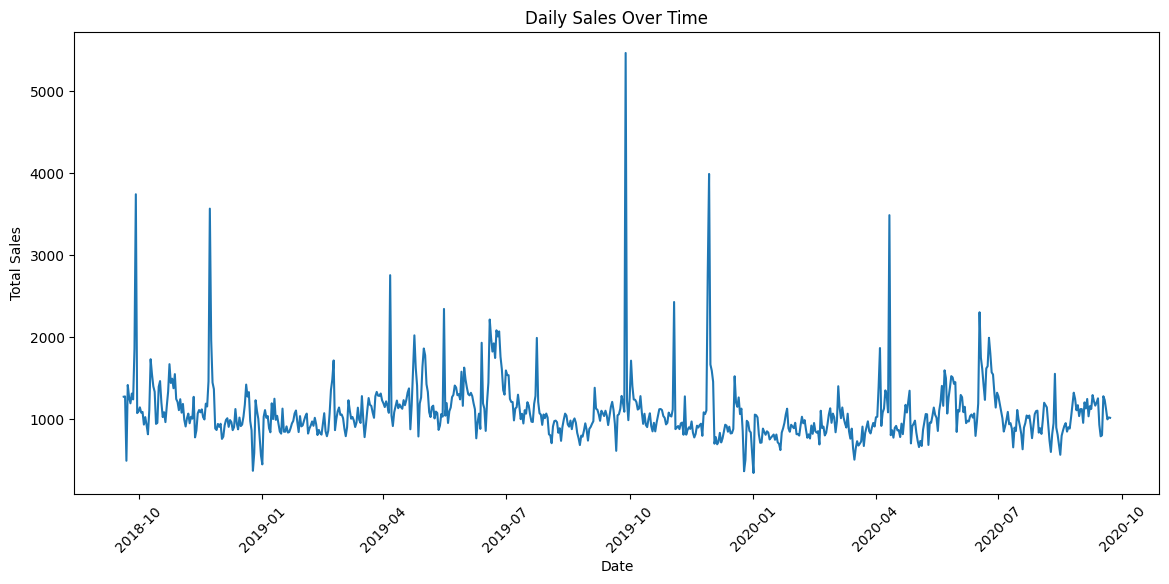

In [6]:
# Ensure 'sale_date' is in datetime format
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Aggregate daily sales
daily_sales = seasonal_data.groupby('sale_date')['total_sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='sale_date', y='total_sales')
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

/var/folders/l3/pzl6kjvx22n0xsd0hgp_xz_m0000gn/T/ipykernel_13188/3843343.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strongest_week_season = weekly_sales.groupby('season').apply(lambda x: x.nlargest(1, 'total_sales')).reset_index(drop=True)


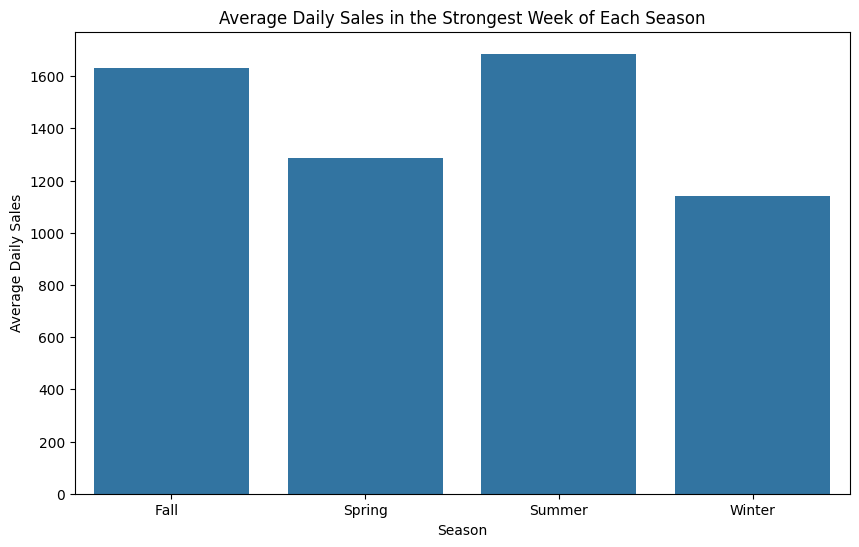

In [63]:
#Strongest Week per Season:

# Ensure 'sale_date' is in datetime format if it's not already
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Step 1: Extract season and week number
seasonal_data['week'] = seasonal_data['sale_date'].dt.isocalendar().week

# Step 2: Calculate total weekly sales for each season
weekly_sales = seasonal_data.groupby(['season', 'week'])['total_sales'].sum().reset_index()

# Step 3: Identify the strongest week for each season
strongest_week_season = weekly_sales.groupby('season').apply(lambda x: x.nlargest(1, 'total_sales')).reset_index(drop=True)

# Step 4: Calculate average daily sales in the strongest week for each season
# Filter for the strongest week data
strongest_week_data = seasonal_data.merge(strongest_week_season[['season', 'week']], on=['season', 'week'])
average_daily_sales = strongest_week_data.groupby(['season', 'sale_date'])['total_sales'].sum().reset_index()
average_daily_sales_season = average_daily_sales.groupby('season')['total_sales'].mean().reset_index()

# Step 5: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=average_daily_sales_season, x='season', y='total_sales')
plt.title("Average Daily Sales in the Strongest Week of Each Season")
plt.xlabel("Season")
plt.ylabel("Average Daily Sales")
plt.show()


/var/folders/l3/pzl6kjvx22n0xsd0hgp_xz_m0000gn/T/ipykernel_13188/4238040580.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strongest_week_season_year = weekly_sales.groupby(['year', 'season'], as_index=False, group_keys=False).apply(
/var/folders/l3/pzl6kjvx22n0xsd0hgp_xz_m0000gn/T/ipykernel_13188/4238040580.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=average_daily_sales_season_year, x='season', y='total_sales', hue='year', ci=None)


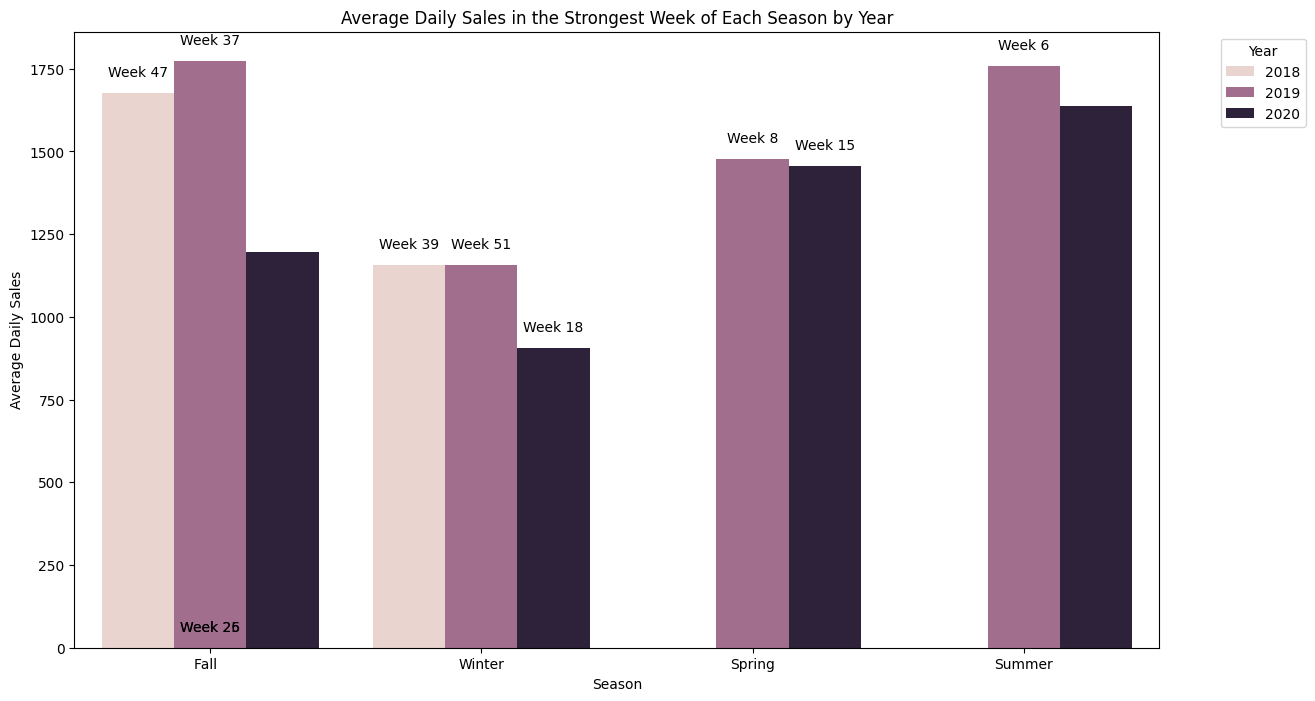

In [68]:
#Strongest Week per Season with Week Number Shown

# Ensure 'sale_date' is in datetime format if it's not already
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Step 1: Extract year, season, and week number
seasonal_data['year'] = seasonal_data['sale_date'].dt.year
seasonal_data['week'] = seasonal_data['sale_date'].dt.isocalendar().week

# Step 2: Calculate total weekly sales for each year and season
weekly_sales = seasonal_data.groupby(['year', 'season', 'week'])['total_sales'].sum().reset_index()

# Step 3: Identify the strongest week for each season and year
strongest_week_season_year = weekly_sales.groupby(['year', 'season'], as_index=False, group_keys=False).apply(
    lambda x: x.nlargest(1, 'total_sales')
)

# Step 4: Calculate average daily sales in the strongest week for each season and year
# Filter for the strongest week data
strongest_week_data = seasonal_data.merge(strongest_week_season_year[['year', 'season', 'week']], on=['year', 'season', 'week'])
average_daily_sales = strongest_week_data.groupby(['year', 'season', 'week', 'sale_date'])['total_sales'].sum().reset_index()
average_daily_sales_season_year = average_daily_sales.groupby(['year', 'season', 'week'])['total_sales'].mean().reset_index()

# Step 5: Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=average_daily_sales_season_year, x='season', y='total_sales', hue='year', ci=None)
plt.title("Average Daily Sales in the Strongest Week of Each Season by Year")
plt.xlabel("Season")
plt.ylabel("Average Daily Sales")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the week number on top of each bar for clarity
for i in range(len(average_daily_sales_season_year)):
    season = average_daily_sales_season_year['season'][i]
    year = average_daily_sales_season_year['year'][i]
    week = average_daily_sales_season_year['week'][i]
    sales = average_daily_sales_season_year['total_sales'][i]
    
    # Find the correct bar position
    bar_index = [i for i, t in enumerate(barplot.get_xticklabels()) if t.get_text() == season][0]
    bar = barplot.patches[bar_index * 3 + (year - 2018)]  # Adjust based on bar positions for each year

    # Place week number text above the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50,  # Position slightly above the bar height
        f"Week {week}",
        ha="center"
    )

plt.show()


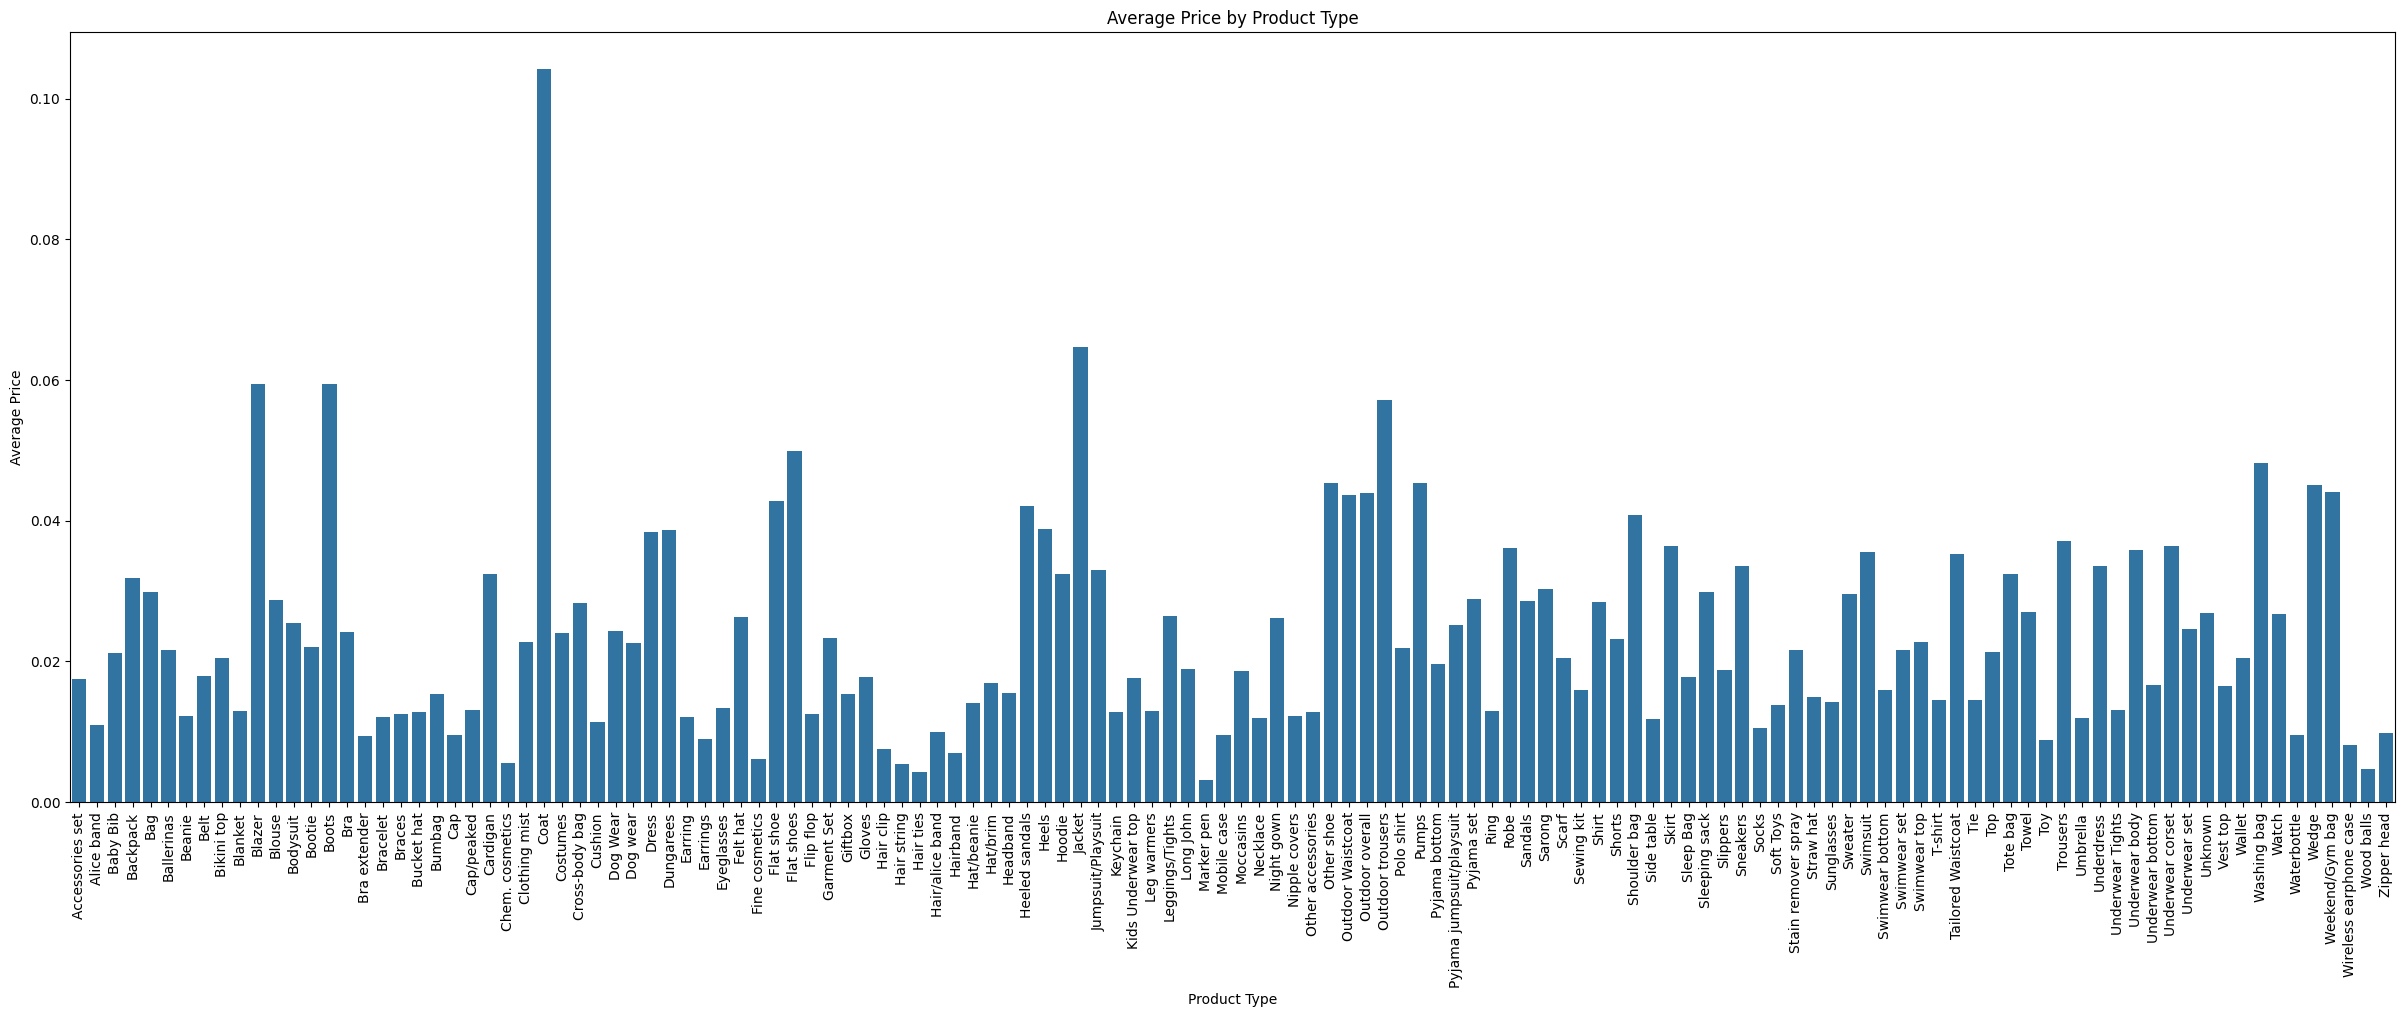

In [64]:
avg_price_by_product = seasonal_data.groupby('product_type_name')['average_price'].mean().reset_index()

plt.figure(figsize=(30, 10))
sns.barplot(data=avg_price_by_product, x='product_type_name', y='average_price')
plt.title("Average Price by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()


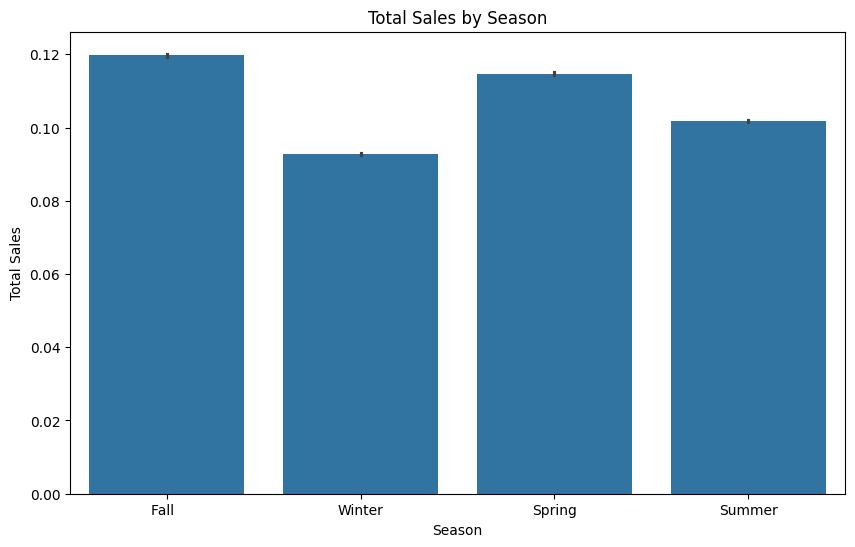

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='season', y='total_sales')
plt.title("Total Sales by Season")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.show()


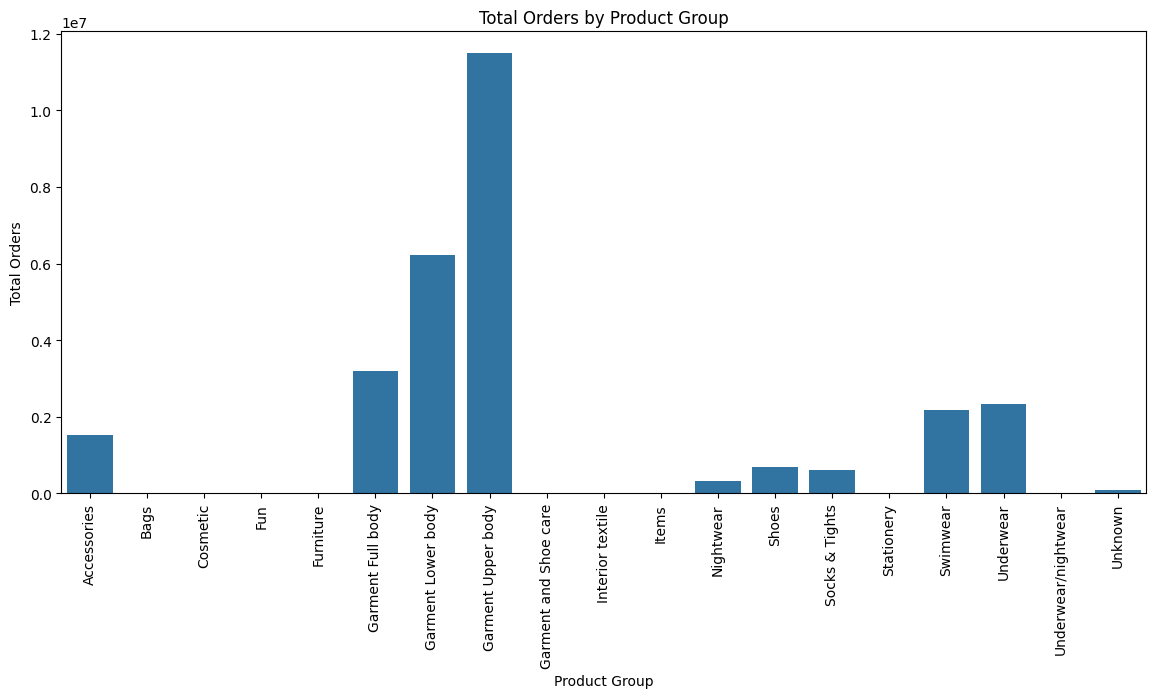

In [16]:
total_orders_by_group = seasonal_data.groupby('product_group_name')['total_orders'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=total_orders_by_group, x='product_group_name', y='total_orders')
plt.title("Total Orders by Product Group")
plt.xlabel("Product Group")
plt.ylabel("Total Orders")
plt.xticks(rotation=90)
plt.show()


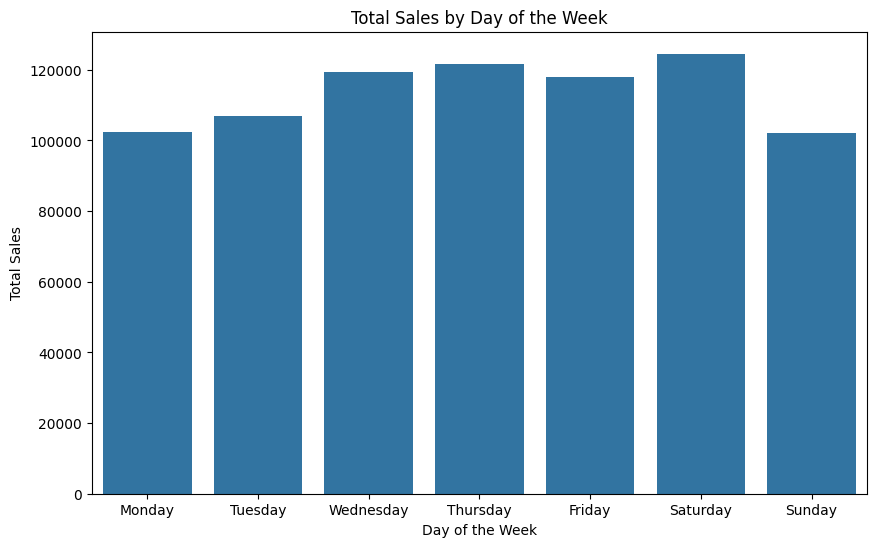

In [17]:
seasonal_data['day_of_week'] = seasonal_data['sale_date'].dt.day_name()  # Add day of week column
sales_by_day = seasonal_data.groupby('day_of_week')['total_sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='day_of_week', y='total_sales')
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()


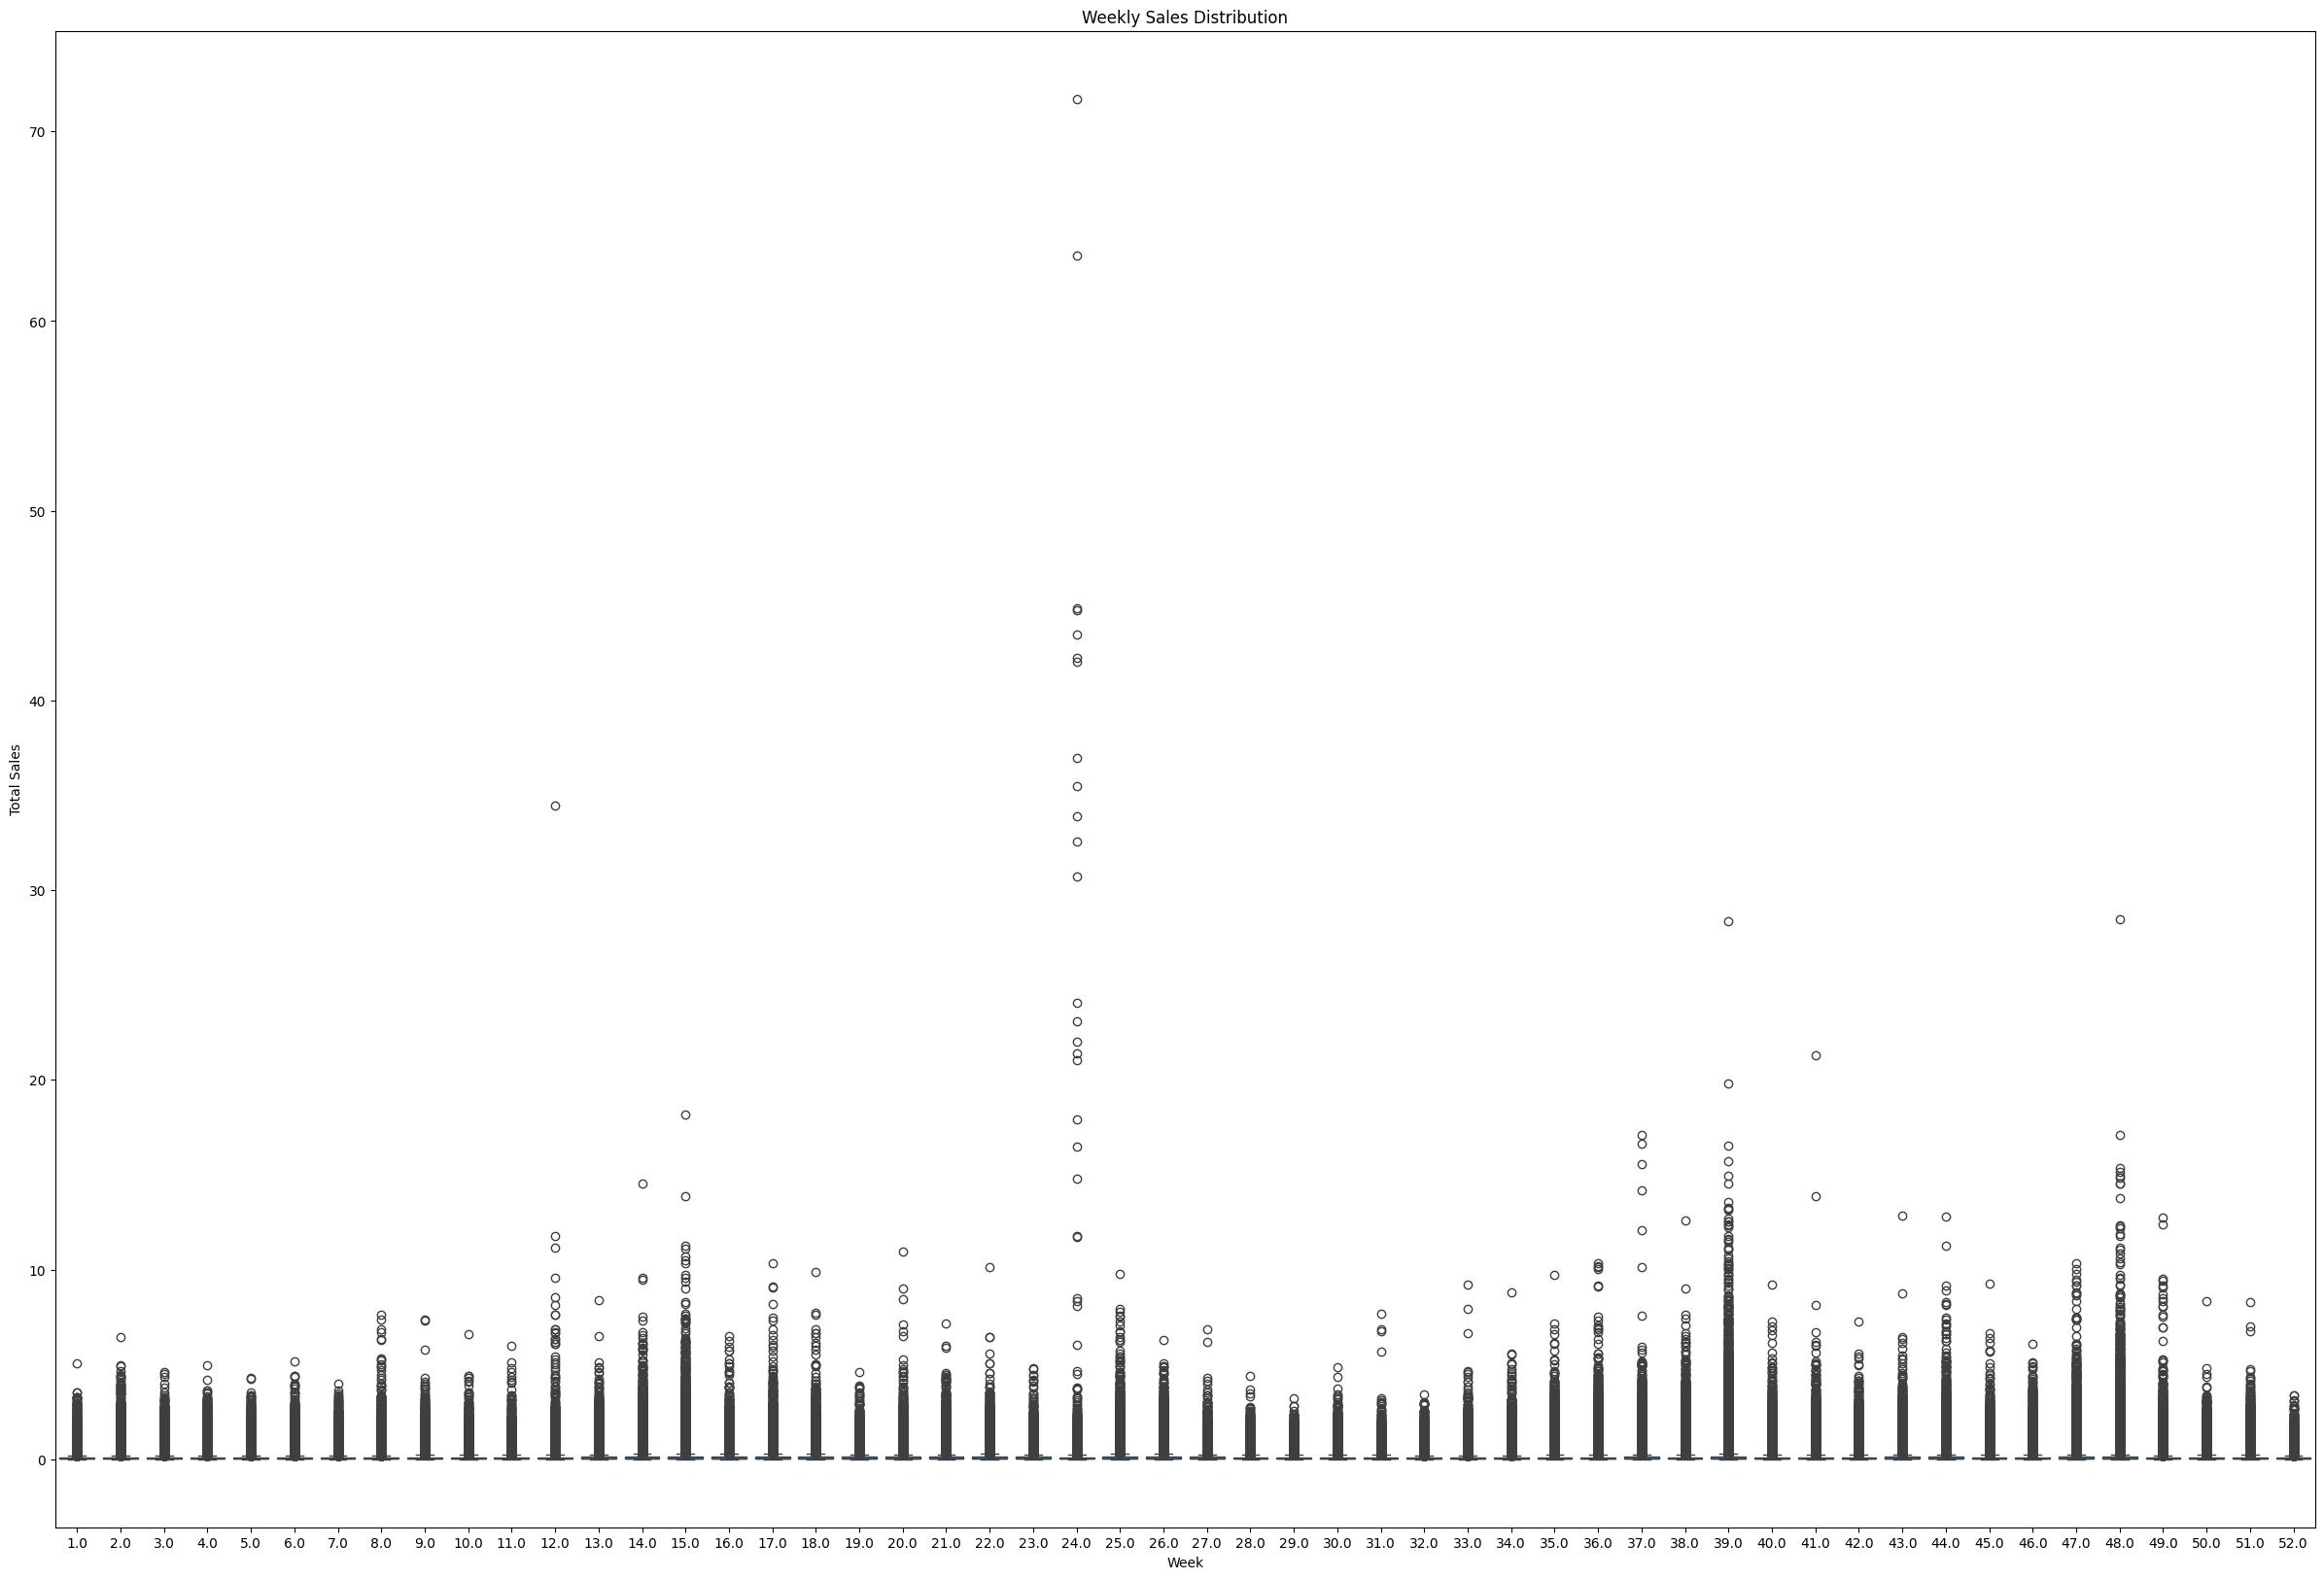

In [62]:
plt.figure(figsize=(30, 20))
sns.boxplot(data=seasonal_data, x='week', y='total_sales')
plt.title("Weekly Sales Distribution")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.show()


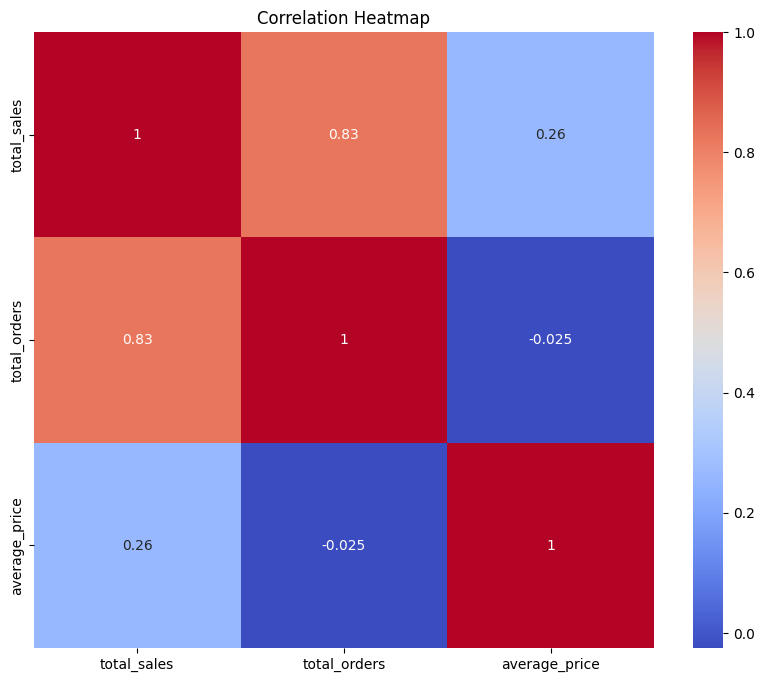

In [29]:
#MAKES NO SENCE!!!

plt.figure(figsize=(10, 8))
sns.heatmap(seasonal_data[['total_sales', 'total_orders', 'average_price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


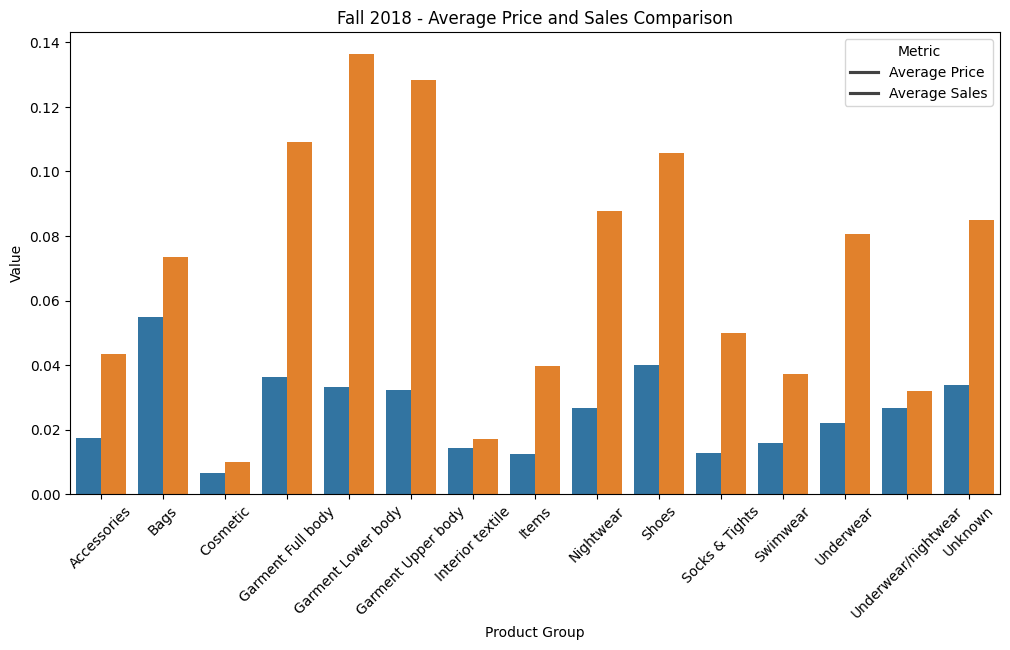

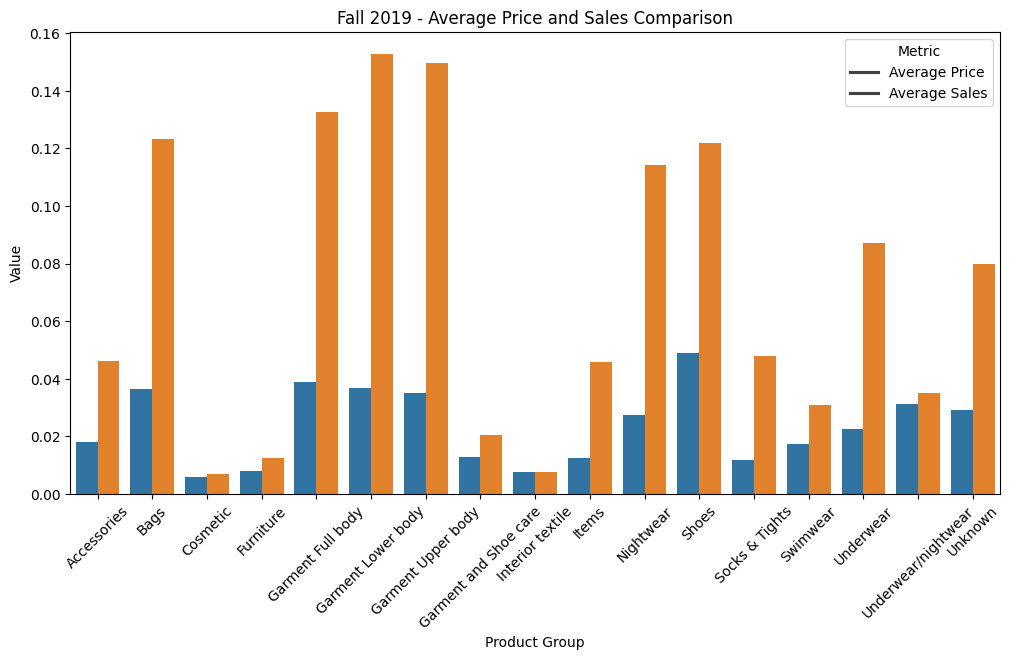

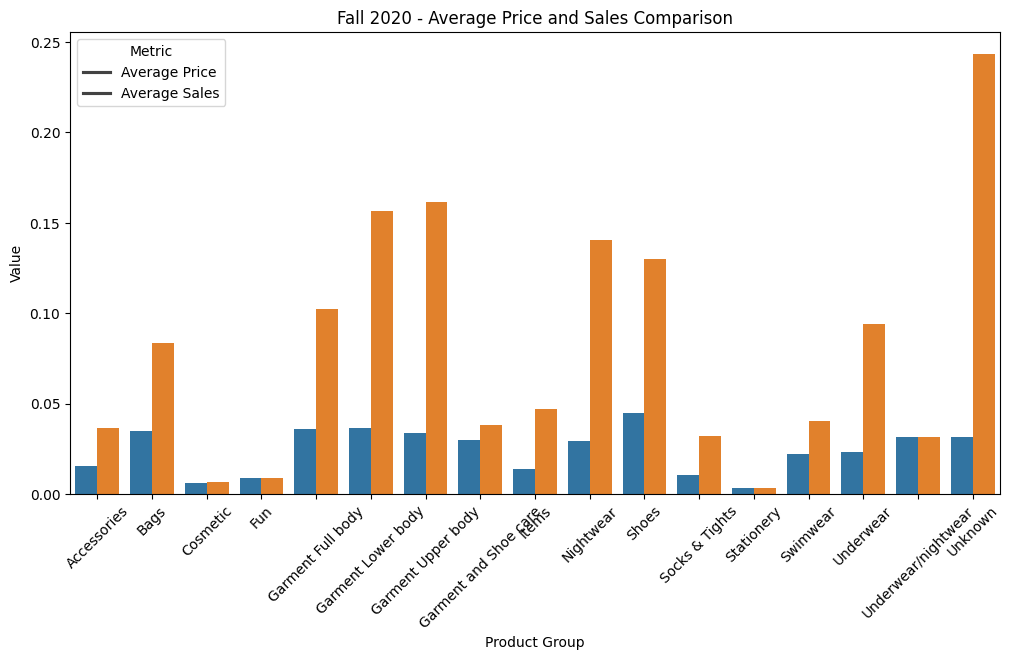

In [28]:
# Ensure 'sale_date' is in datetime format
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Define a function to filter data for a specific fall season
def get_fall_data(year):
    return seasonal_data[(seasonal_data['sale_date'].dt.year == year) &
                         (seasonal_data['sale_date'].dt.month.isin([9, 10, 11]))]

# Define a plotting function to compare avg price and avg sales
def plot_avg_price_sales_comparison(data, title):
    avg_category_stats = data.groupby('product_group_name').agg(
        avg_category_price=('average_price', 'mean'),
        avg_category_sales=('total_sales', 'mean')
    ).reset_index()

    # Melt the data to have a long-form DataFrame for Seaborn
    avg_category_stats_melted = avg_category_stats.melt(id_vars="product_group_name", 
                                                        value_vars=["avg_category_price", "avg_category_sales"],
                                                        var_name="Metric", value_name="Value")

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_category_stats_melted, x='product_group_name', y='Value', hue='Metric')
    plt.title(f"{title} - Average Price and Sales Comparison")
    plt.xlabel("Product Group")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.legend(title="Metric", labels=["Average Price", "Average Sales"])
    plt.show()

# Plot for Fall 2018
fall_2018 = get_fall_data(2018)
plot_avg_price_sales_comparison(fall_2018, "Fall 2018")

# Plot for Fall 2019
fall_2019 = get_fall_data(2019)
plot_avg_price_sales_comparison(fall_2019, "Fall 2019")

# Plot for Fall 2020
fall_2020 = get_fall_data(2020)
plot_avg_price_sales_comparison(fall_2020, "Fall 2020")


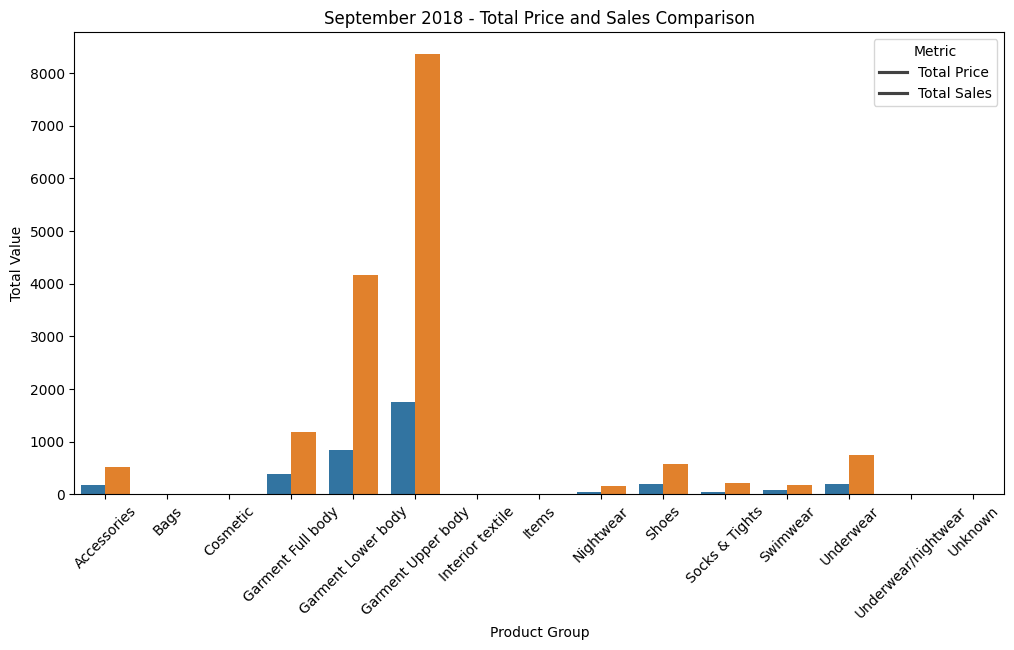

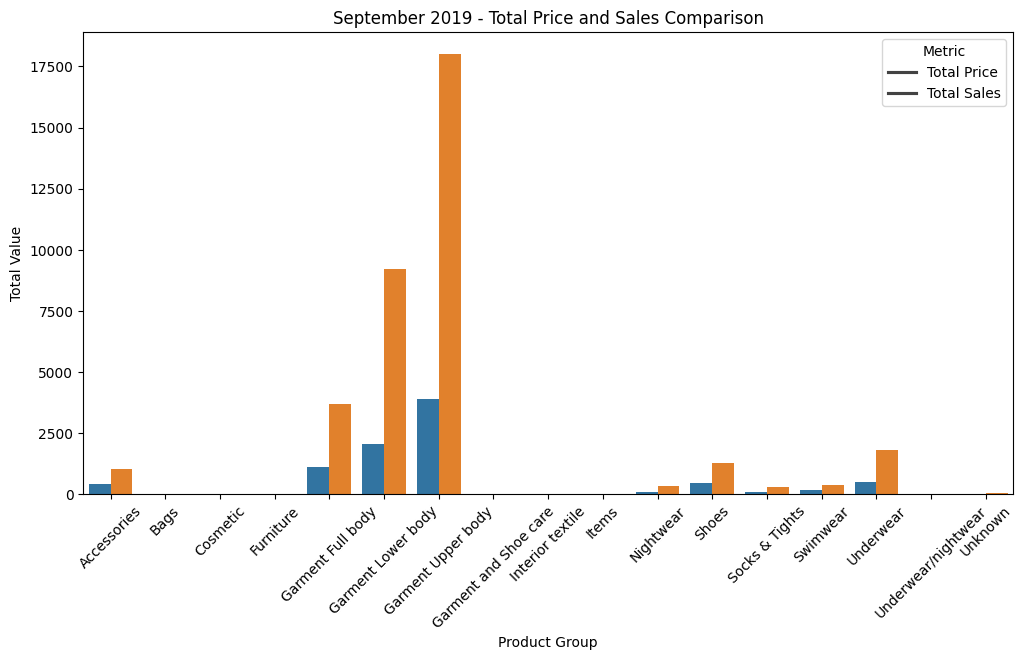

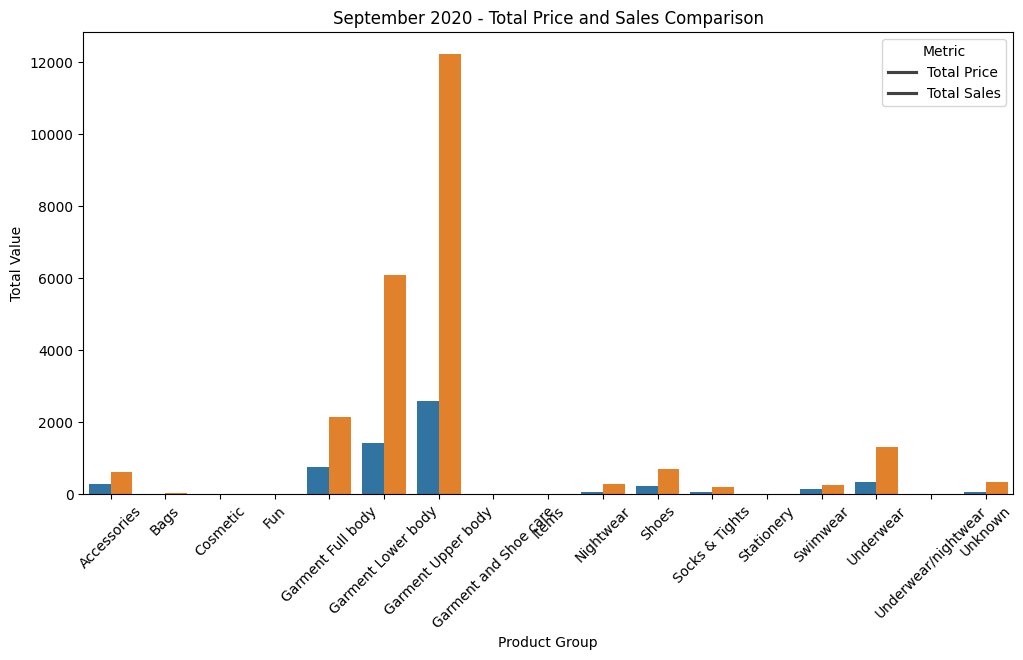

In [25]:
#Total Price to Total Sales September per Month: 

# Ensure 'sale_date' is in datetime format
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Define a function to filter data for a specific fall season
def get_fall_data(year):
    return seasonal_data[(seasonal_data['sale_date'].dt.year == year) &
                         (seasonal_data['sale_date'].dt.month.isin([9]))]

# Define a plotting function to compare total price and total sales
def plot_total_price_sales_comparison(data, title):
    total_category_stats = data.groupby('product_group_name').agg(
        total_category_price=('average_price', 'sum'),  # Assuming average_price * total_orders approximates total revenue
        total_category_sales=('total_sales', 'sum')
    ).reset_index()

    # Melt the data to have a long-form DataFrame for Seaborn
    total_category_stats_melted = total_category_stats.melt(id_vars="product_group_name", 
                                                            value_vars=["total_category_price", "total_category_sales"],
                                                            var_name="Metric", value_name="Value")

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(data=total_category_stats_melted, x='product_group_name', y='Value', hue='Metric')
    plt.title(f"{title} - Total Price and Sales Comparison")
    plt.xlabel("Product Group")
    plt.ylabel("Total Value")
    plt.xticks(rotation=45)
    plt.legend(title="Metric", labels=["Total Price", "Total Sales"])
    plt.show()

# Plot for Fall 2018
fall_2018 = get_fall_data(2018)
plot_total_price_sales_comparison(fall_2018, "September 2018")

# Plot for Fall 2019
fall_2019 = get_fall_data(2019)
plot_total_price_sales_comparison(fall_2019, "September 2019")

# Plot for Fall 2020
fall_2020 = get_fall_data(2020)
plot_total_price_sales_comparison(fall_2020, "September 2020")



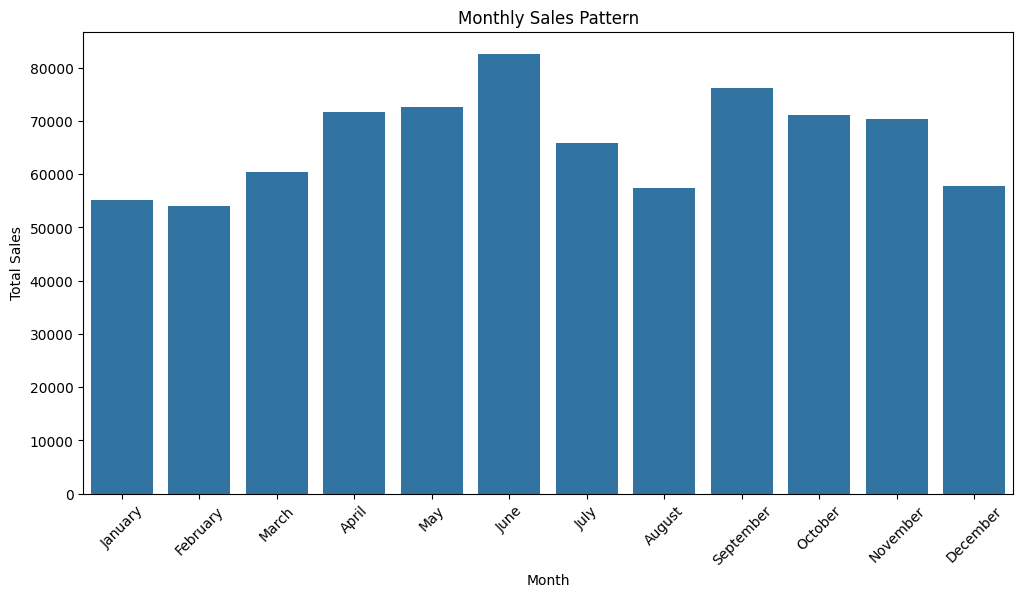

In [20]:
# Ensure 'sale_date' is in datetime format
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Extract the month name directly from 'sale_date'
seasonal_data['month'] = seasonal_data['sale_date'].dt.month_name()

# Now, proceed with grouping and plotting as before
monthly_sales = seasonal_data.groupby('month')['total_sales'].sum().reset_index()

# Ensure the month names are in the correct order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Plotting with a barplot to display monthly total sales
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='month', y='total_sales', order=month_order)
plt.title("Monthly Sales Pattern")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


/var/folders/l3/pzl6kjvx22n0xsd0hgp_xz_m0000gn/T/ipykernel_13188/1569459134.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_30_percent_sales = total_sales_season.groupby('season').apply(


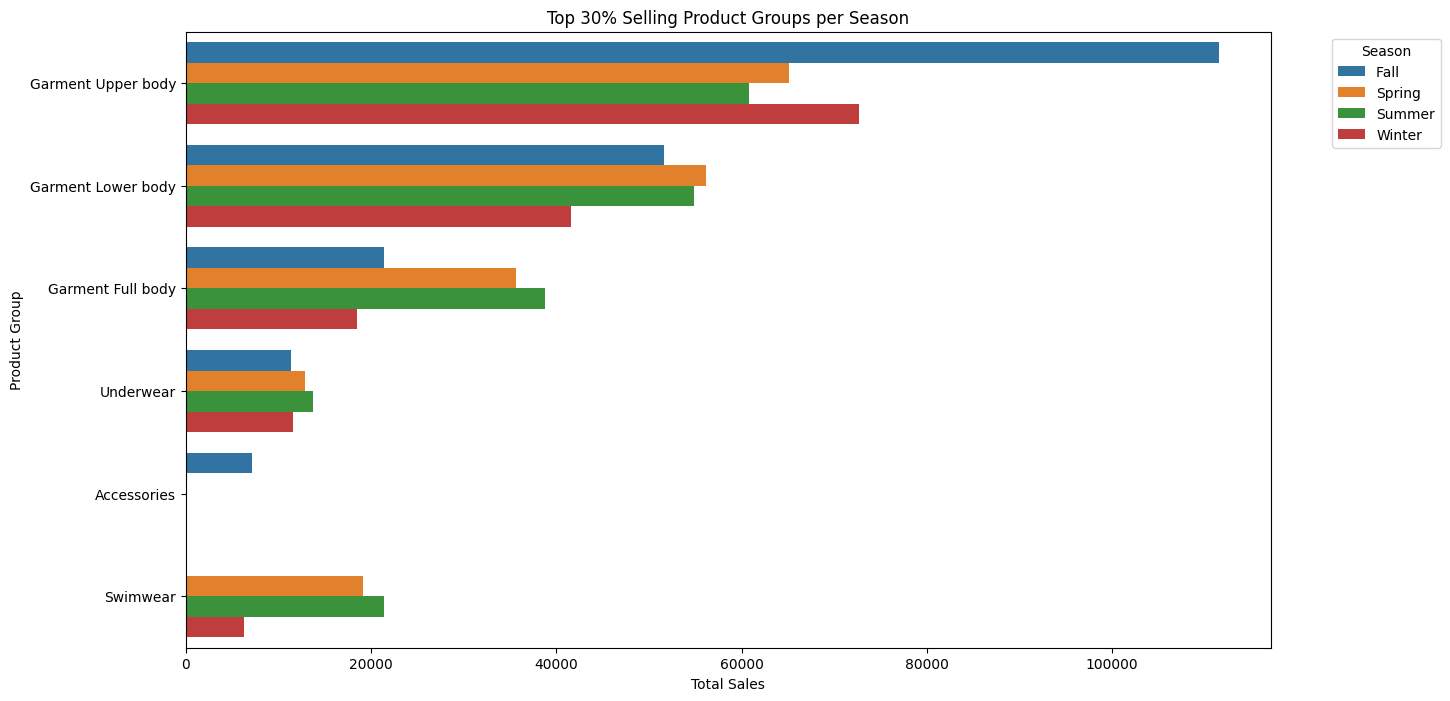

In [41]:
#30% Best Selling Items per Season

# Ensure 'sale_date' is in datetime format if it's not already
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Step 1: Calculate total sales per product group per season
total_sales_season = seasonal_data.groupby(['season', 'product_group_name'])['total_sales'].sum().reset_index()

# Step 2: Select the top 30% of selling product groups per season
top_30_percent_sales = total_sales_season.groupby('season').apply(
    lambda x: x.nlargest(int(len(x) * 0.3), 'total_sales')
).reset_index(drop=True)

# Step 3: Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=top_30_percent_sales, x='total_sales', y='product_group_name', hue='season')
plt.title("Top 30% Selling Product Groups per Season")
plt.xlabel("Total Sales")
plt.ylabel("Product Group")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/l3/pzl6kjvx22n0xsd0hgp_xz_m0000gn/T/ipykernel_13188/3474489772.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_30_percent_items = total_sales_item_season.groupby('season').apply(


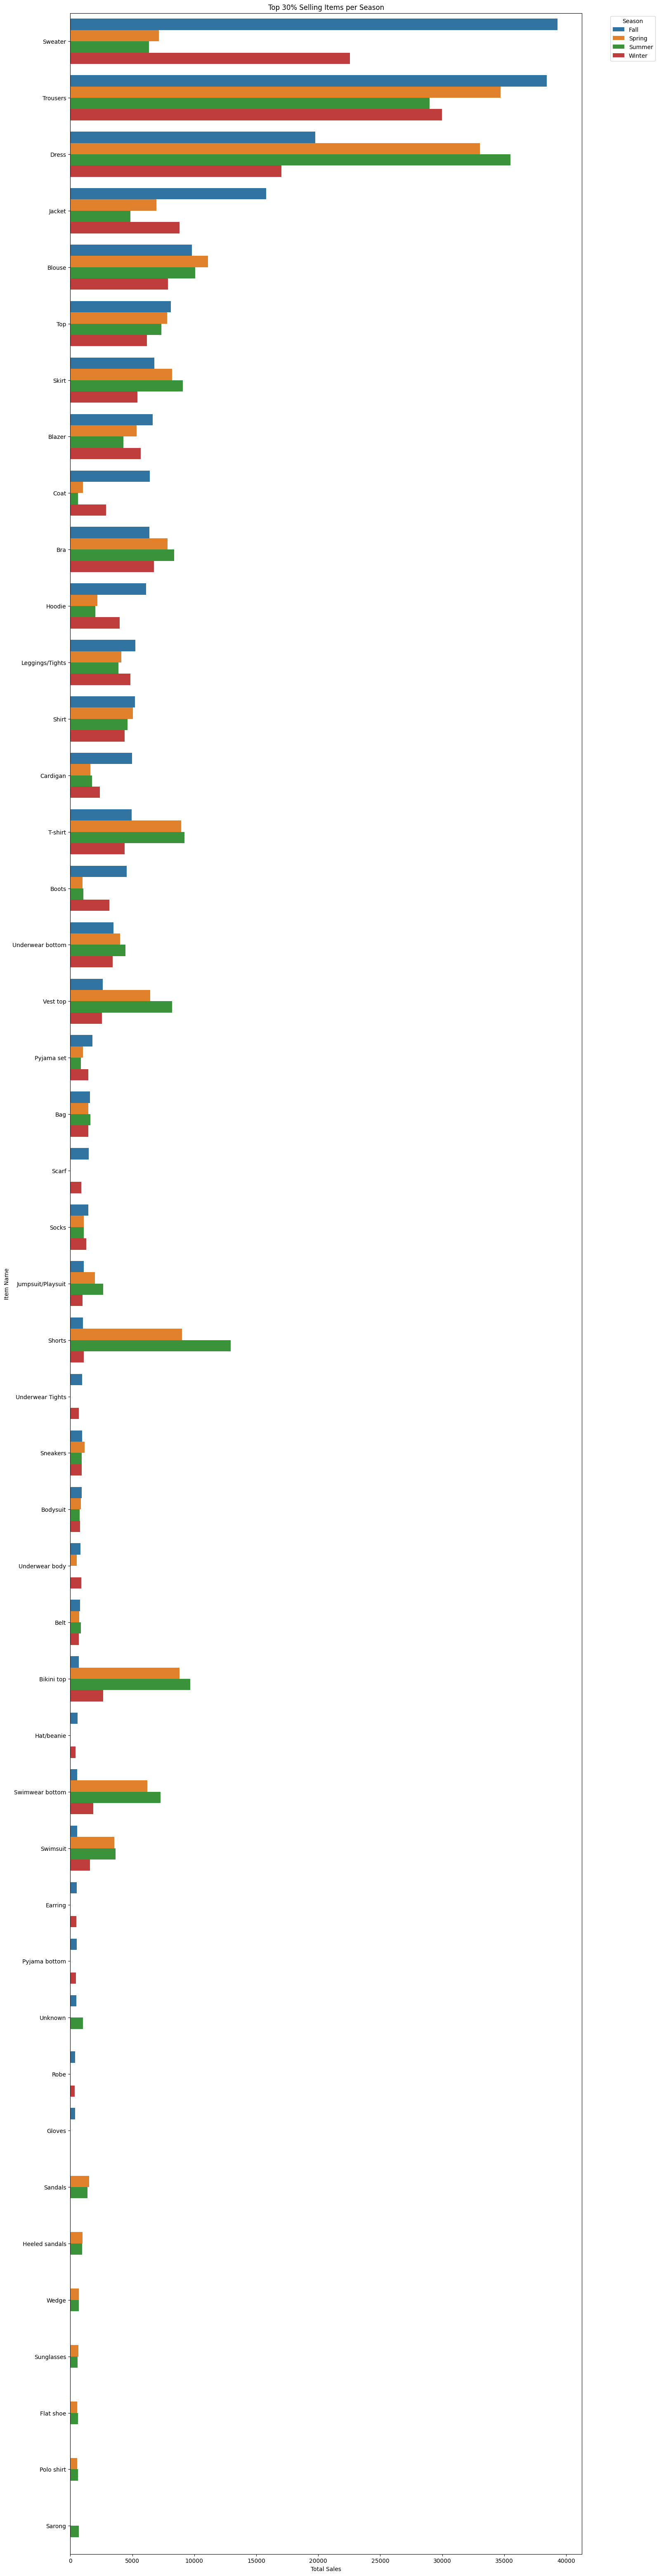

In [48]:
#30% Of best Selling Product Types per Season:

# Ensure 'sale_date' is in datetime format if it's not already
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Step 1: Calculate total sales per season for each item
total_sales_item_season = seasonal_data.groupby(['season', 'product_type_name'])['total_sales'].sum().reset_index()

# Step 2: Select the top 30% of selling items per season
top_30_percent_items = total_sales_item_season.groupby('season').apply(
    lambda x: x.nlargest(int(len(x) * 0.3), 'total_sales')
).reset_index(drop=True)

# Step 3: Plotting
plt.figure(figsize=(16, 80))
sns.barplot(data=top_30_percent_items, x='total_sales', y='product_type_name', hue='season')
plt.title("Top Selling Items per Season 30% Selling Items per Season")
plt.xlabel("Total Sales")
plt.ylabel("Item Name")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



/var/folders/l3/pzl6kjvx22n0xsd0hgp_xz_m0000gn/T/ipykernel_13188/2985258104.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_30_percent_items = total_sales_product_type_season.groupby('season').apply(


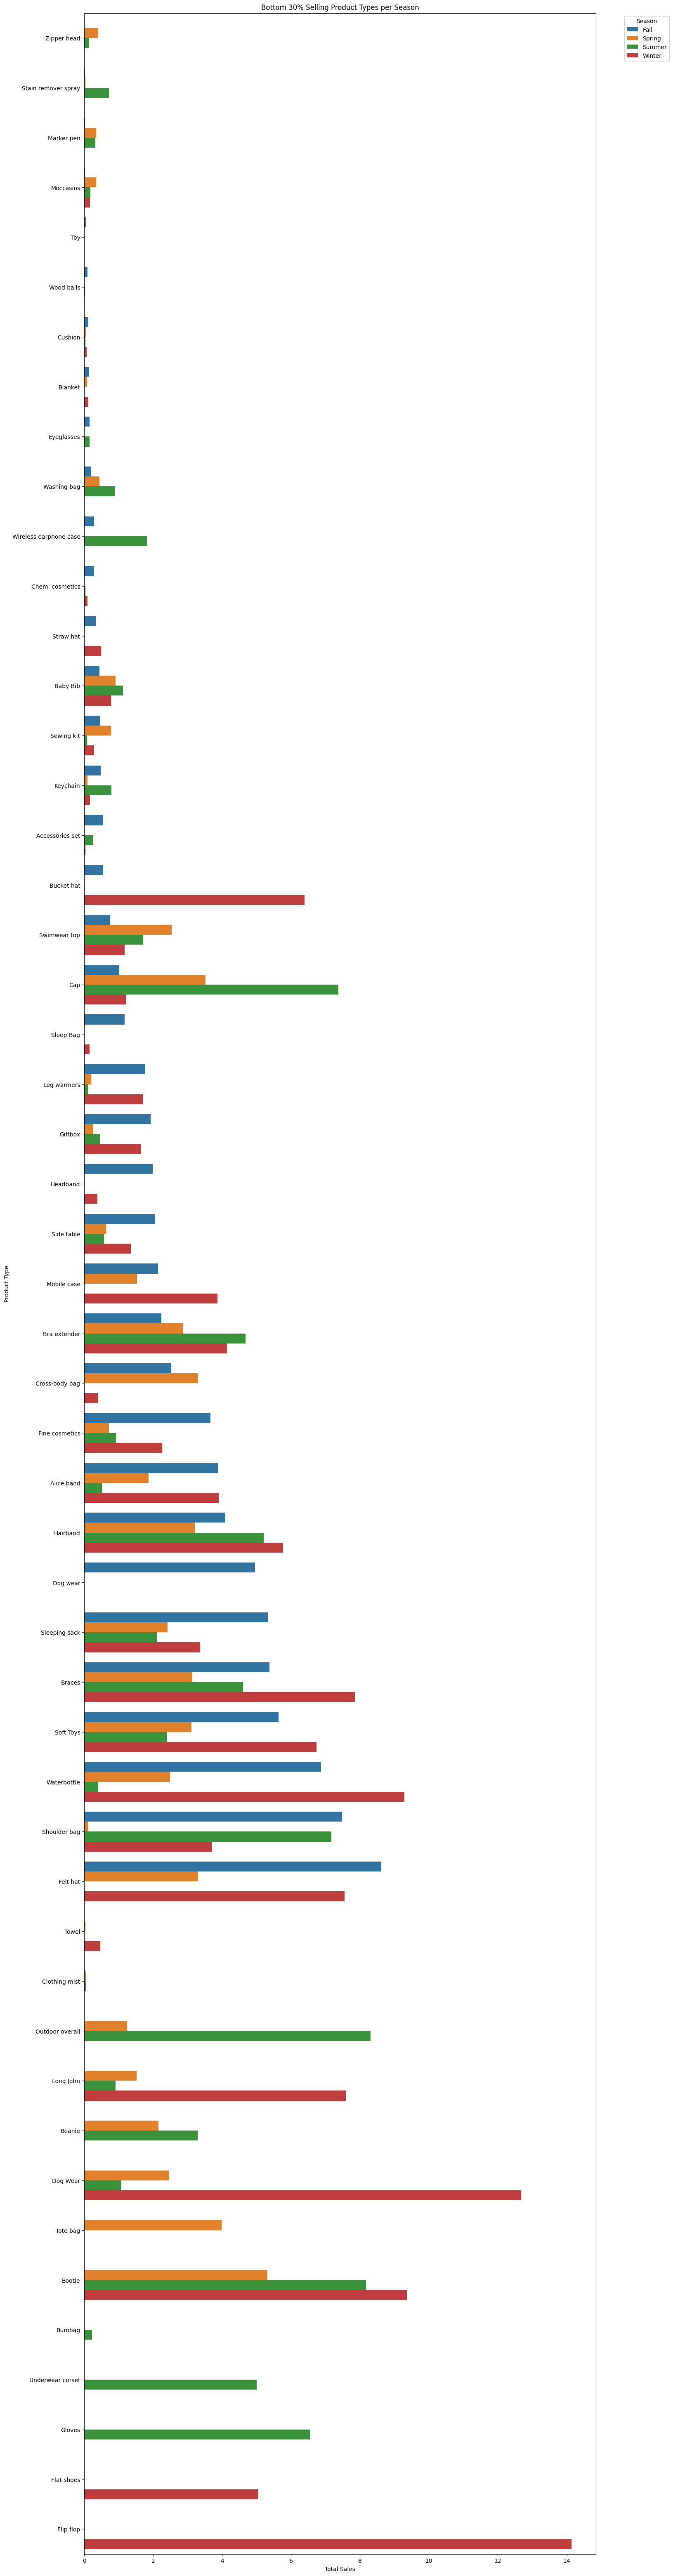

In [49]:
#30% Of WORST Selling Product Types per Season:

# Ensure 'sale_date' is in datetime format if it's not already
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Step 1: Calculate total sales per season for each product type
total_sales_product_type_season = seasonal_data.groupby(['season', 'product_type_name'])['total_sales'].sum().reset_index()

# Step 2: Select the bottom 30% of selling product types per season
bottom_30_percent_items = total_sales_product_type_season.groupby('season').apply(
    lambda x: x.nsmallest(int(len(x) * 0.3), 'total_sales')
).reset_index(drop=True)

# Step 3: Plotting
plt.figure(figsize=(16, 80))
sns.barplot(data=bottom_30_percent_items, x='total_sales', y='product_type_name', hue='season')
plt.title("Bottom 30% Selling Product Types per Season")
plt.xlabel("Total Sales")
plt.ylabel("Product Type")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


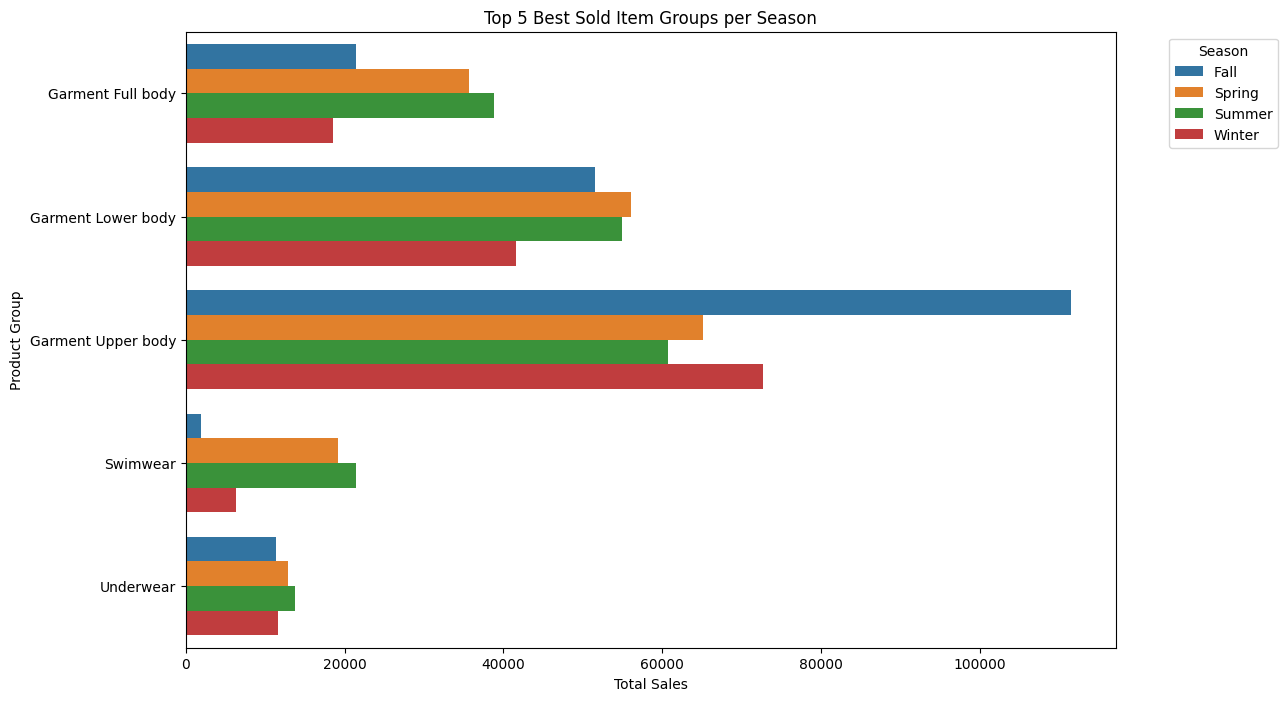

In [40]:
#Top 5 Per Seasion

# Ensure 'sale_date' is in datetime format if it's not already
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Step 1: Calculate total sales per product group across all seasons
total_sales_product_group = seasonal_data.groupby(['product_group_name'])['total_sales'].sum().reset_index()

# Step 2: Find the Top 5 Best Selling Product Groups overall
best_5_product_groups = total_sales_product_group.nlargest(5, 'total_sales')['product_group_name']

# Step 3: Filter the original data for these product groups and calculate total sales per season
top_sales_data = seasonal_data[seasonal_data['product_group_name'].isin(best_5_product_groups)]
seasonal_sales = top_sales_data.groupby(['product_group_name', 'season'])['total_sales'].sum().reset_index()

# Step 4: Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=seasonal_sales, x='total_sales', y='product_group_name', hue='season')
plt.title("Top 5 Best Sold Item Groups per Season")
plt.xlabel("Total Sales")
plt.ylabel("Product Group")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



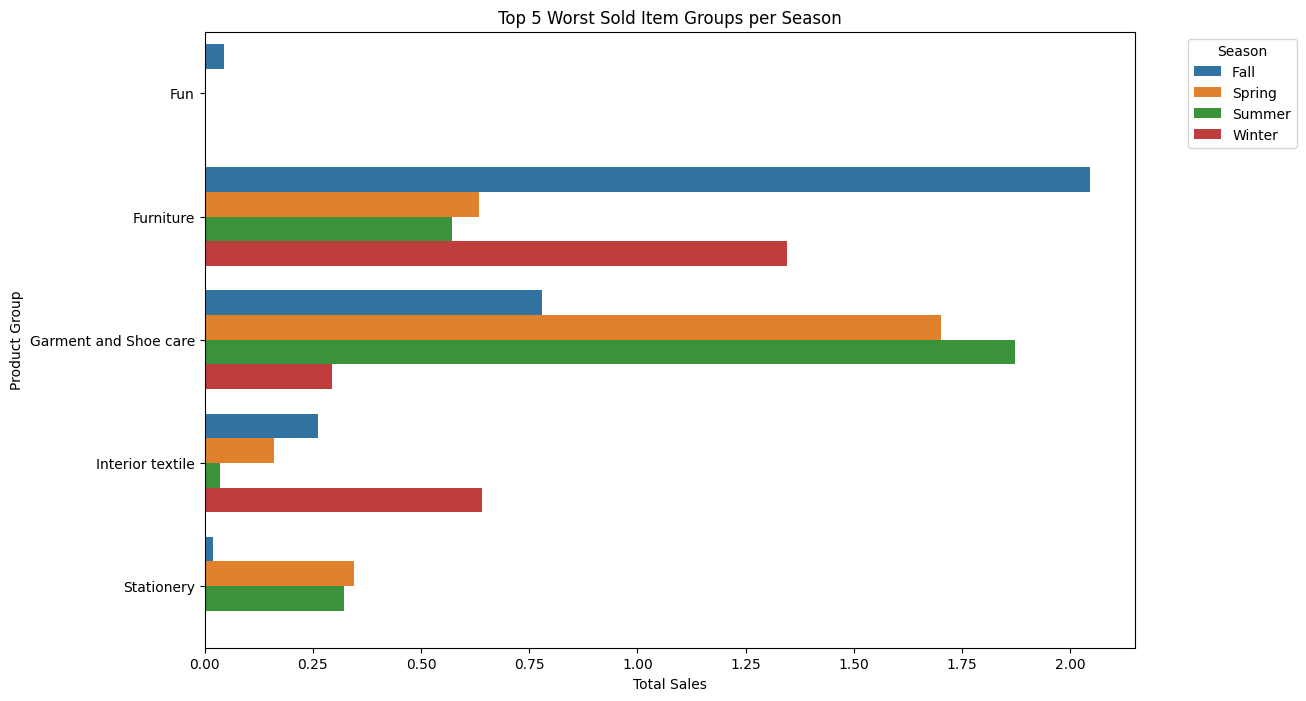

In [39]:
#Flot 5 Per Seasion

# Ensure 'sale_date' is in datetime format if it's not already
seasonal_data['sale_date'] = pd.to_datetime(seasonal_data['sale_date'])

# Step 1: Calculate total sales per product group across all seasons
total_sales_product_group = seasonal_data.groupby(['product_group_name'])['total_sales'].sum().reset_index()

# Step 2: Find the Top 5 Worst Selling Product Groups overall
worst_5_product_groups = total_sales_product_group.nsmallest(5, 'total_sales')['product_group_name']

# Step 3: Filter the original data for these product groups and calculate total sales per season
bottom_sales_data = seasonal_data[seasonal_data['product_group_name'].isin(worst_5_product_groups)]
seasonal_sales = bottom_sales_data.groupby(['product_group_name', 'season'])['total_sales'].sum().reset_index()

# Step 4: Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=seasonal_sales, x='total_sales', y='product_group_name', hue='season')
plt.title("Top 5 Worst Sold Item Groups per Season")
plt.xlabel("Total Sales")
plt.ylabel("Product Group")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


